# Automating Reviews in Medicine

The medical literature is enormous. Pubmed, a database of medical publications maintained by the U.S. National Library of Medicine, has indexed over 23 million medical publications. Further, the rate of medical publication has increased over time, and now there are nearly 1 million new publications in the field each year, or more than one per minute.

The large size and fast-changing nature of the medical literature has increased the need for reviews, which search databases like Pubmed for papers on a particular topic and then report results from the papers found. While such reviews are often performed manually, with multiple people reviewing each search result, this is tedious and time consuming. In this problem, we will see how text analytics can be used to automate the process of information retrieval.

The dataset consists of the titles (variable *title*) and abstracts (variable *abstract*) of papers retrieved in a [Pubmed](http://www.ncbi.nlm.nih.gov/pubmed) search. Each search result is labeled with whether the paper is a clinical trial testing a drug therapy for cancer (variable *trial*). These labels were obtained by two people reviewing each search result and accessing the actual paper if necessary, as part of a literature review of clinical trials testing drug therapies for advanced and metastatic breast cancer.

## Loading the Data

In [1]:
Sys.setlocale(locale="C")

[1] "C"

In [2]:
trials = read.csv("./dataset/clinical_trial.csv", stringsAsFactors=FALSE)

In [3]:
summary(trials)

    title             abstract             trial       
 Length:1860        Length:1860        Min.   :0.0000  
 Class :character   Class :character   1st Qu.:0.0000  
 Mode  :character   Mode  :character   Median :0.0000  
                                       Mean   :0.4392  
                                       3rd Qu.:1.0000  
                                       Max.   :1.0000  

In [4]:
str(trials)

'data.frame':	1860 obs. of  3 variables:
 $ title   : chr  "Treatment of Hodgkin's disease and other cancers with 1,3-bis(2-chloroethyl)-1-nitrosourea (BCNU; NSC-409962)." "Cell mediated immune status in malignancy--pretherapy and post-therapy assessment." "Neoadjuvant vinorelbine-capecitabine versus docetaxel-doxorubicin-cyclophosphamide in early nonresponsive breas"| __truncated__ "Randomized phase 3 trial of fluorouracil, epirubicin, and cyclophosphamide alone or followed by Paclitaxel for "| __truncated__ ...
 $ abstract: chr  "" "Twenty-eight cases of malignancies of different kinds were studied to assess T-cell activity and population bef"| __truncated__ "BACKGROUND: Among breast cancer patients, nonresponse to initial neoadjuvant chemotherapy is associated with un"| __truncated__ "BACKGROUND: Taxanes are among the most active drugs for the treatment of metastatic breast cancer, and, as a co"| __truncated__ ...
 $ trial   : int  1 0 1 1 1 0 1 0 0 0 ...


In [5]:
summary(nchar(trials$abstract))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    1196    1583    1481    1821    3708 

In [6]:
sum(nchar(trials$abstract) == 0)

[1] 112

In [7]:
which.min(nchar(trials$title))

[1] 1258

In [8]:
trials[1258,]$title

[1] "A decade of letrozole: FACE."

## Preparing the Corpus

Because we have both title and abstract information for trials, we need to build two corpora instead of one. Name them corpusTitle and corpusAbstract.

Following the commands from lecture, perform the following tasks (you might need to load the "tm" package first if it isn't already loaded). Make sure to perform them in this order.

1) Convert the title variable to corpusTitle and the abstract variable to corpusAbstract.

2) Convert corpusTitle and corpusAbstract to lowercase.

3) Remove the punctuation in corpusTitle and corpusAbstract.

4) Remove the English language stop words from corpusTitle and corpusAbstract.

5) Stem the words in corpusTitle and corpusAbstract (each stemming might take a few minutes).

6) Build a document term matrix called dtmTitle from corpusTitle and dtmAbstract from corpusAbstract.

7) Limit dtmTitle and dtmAbstract to terms with sparseness of at most 95% (aka terms that appear in at least 5% of documents).

8) Convert dtmTitle and dtmAbstract to data frames (keep the names dtmTitle and dtmAbstract).

In [9]:
library("tm")
library("SnowballC")

Loading required package: NLP



In [10]:
# Create corpus
corpusTitle = VCorpus(VectorSource(trials$title))
corpusAbstract = VCorpus(VectorSource(trials$abstract))

In [11]:
corpusTitle = tm_map(corpusTitle, content_transformer(tolower))
corpusAbstract = tm_map(corpusAbstract, content_transformer(tolower))

In [12]:
corpusTitle = tm_map(corpusTitle, removePunctuation)
corpusAbstract = tm_map(corpusAbstract, removePunctuation)

In [13]:
corpusTitle = tm_map(corpusTitle, removeWords, stopwords("english"))
corpusAbstract = tm_map(corpusAbstract, removeWords, stopwords("english"))

In [14]:
corpusTitle = tm_map(corpusTitle, stemDocument)
corpusAbstract = tm_map(corpusAbstract, stemDocument)

In [15]:
dtmTitle = DocumentTermMatrix(corpusTitle)
dtmAbstract = DocumentTermMatrix(corpusAbstract)

In [16]:
dtmTitle

<<DocumentTermMatrix (documents: 1860, terms: 2835)>>
Non-/sparse entries: 23417/5249683
Sparsity           : 100%
Maximal term length: 49
Weighting          : term frequency (tf)

In [17]:
dtmAbstract

<<DocumentTermMatrix (documents: 1860, terms: 12367)>>
Non-/sparse entries: 153263/22849357
Sparsity           : 99%
Maximal term length: 67
Weighting          : term frequency (tf)

In [18]:
dtmTitle = removeSparseTerms(dtmTitle, 0.95)
dtmAbstract = removeSparseTerms(dtmAbstract, 0.95)

In [19]:
dtmTitle

<<DocumentTermMatrix (documents: 1860, terms: 31)>>
Non-/sparse entries: 10683/46977
Sparsity           : 81%
Maximal term length: 15
Weighting          : term frequency (tf)

In [20]:
dtmAbstract

<<DocumentTermMatrix (documents: 1860, terms: 335)>>
Non-/sparse entries: 92005/531095
Sparsity           : 85%
Maximal term length: 15
Weighting          : term frequency (tf)

In [21]:
dtmTitle = as.data.frame(as.matrix(dtmTitle))
dtmAbstract = as.data.frame(as.matrix(dtmAbstract))

In [22]:
sort(colSums(dtmAbstract), decreasing=TRUE)

patient          breast          cancer       treatment           group 
           8381            3859            3726            2894            2668 
   chemotherapi         respons        signific           studi          surviv 
           2344            2051            2043            1965            1927 
         receiv       tamoxifen           month         therapi          random 
           1908            1632            1597            1565            1520 
         result           women           trial          compar            year 
           1485            1484            1417            1359            1342 
         effect             day            rate          median          differ 
           1340            1254            1253            1180            1176 
          adjuv            mgm2            dose           tumor            week 
           1162            1134            1124            1122            1090 
          toxic             use             arm            cycl          overal 
           1065            1053            1038             962             962 
         diseas          clinic          combin           evalu           treat 
            950             944             926             926             893 
         method             two            time         conclus         regimen 
            892             889             881             842             807 
        respect        metastat           level         increas         primari 
            758             755             743             729             718 
         observ          follow          assess            risk cyclophosphamid 
            700             675             668             635             632 
        complet            plus        progress         control          associ 
            628             622             622             621             604 
       efficaci    postmenopaus             cmf         analysi           grade 
            591             590             589             587             580 
       receptor             one          versus           three          improv 
            573             570             570             564             562 
         advanc          factor         benefit          status          either 
            556             552             551             538             532 
         includ            show            bone       docetaxel           posit 
            529             516             514             514             511 
          activ        followup           everi     doxorubicin           phase 
            509             494             487             486             481 
           node         placebo            alon          recurr         similar 
            477             475             472             465             438 
         assign          purpos           chang             age          hormon 
            435             434             431             429             428 
           oral        estrogen           first           addit          higher 
            422             421             421             420             415 
            may           daili          measur           event         surgeri 
            413             412             411             409             407 
           data          object           reduc      background      paclitaxel 
            405             400             400             397             397 
          total         statist            high           given           toler 
            397             384             378             374             373 
           four         predict           among            also      diseasefre 
            369             369             365             364             364 
           cell          report         express        previous        determin 
            359             357        

## Building a model

We want to combine dtmTitle and dtmAbstract into a single data frame to make predictions. However, some of the variables in these data frames have the same names. To fix this issue, run the following commands:
```R
colnames(dtmTitle) = paste0("T", colnames(dtmTitle))

colnames(dtmAbstract) = paste0("A", colnames(dtmAbstract))
```

In [23]:
colnames(dtmTitle) = paste0("T", colnames(dtmTitle))
colnames(dtmAbstract) = paste0("A", colnames(dtmAbstract))

Using cbind(), combine dtmTitle and dtmAbstract into a single data frame called dtm:
```R
dtm = cbind(dtmTitle, dtmAbstract)
```

In [24]:
dtm = cbind(dtmTitle, dtmAbstract)

In [25]:
dtm$trial = trials$trial

In [26]:
ncol(dtm)

[1] 367

Now that we have prepared our data frame, it's time to split it into a training and testing set and to build regression models. Set the random seed to 144 and use the sample.split function from the caTools package to split dtm into data frames named "train" and "test", putting 70% of the data in the training set.

In [27]:
library("caTools")
set.seed(144)

In [28]:
split = sample.split(dtm$trial, SplitRatio=0.7)
train = subset(dtm, split == TRUE)
test = subset(dtm, split == FALSE)

In [29]:
table(train$trial)


  0   1 
730 572 

In [30]:
baseline_acc = 730 / nrow(train)
baseline_acc

[1] 0.5606759

Build a CART model called trialCART, using all the independent variables in the training set to train the model, and then plot the CART model. Just use the default parameters to build the model (don't add a minbucket or cp value). Remember to add the method="class" argument, since this is a classification problem.

In [31]:
library("rpart")
library("rpart.plot")

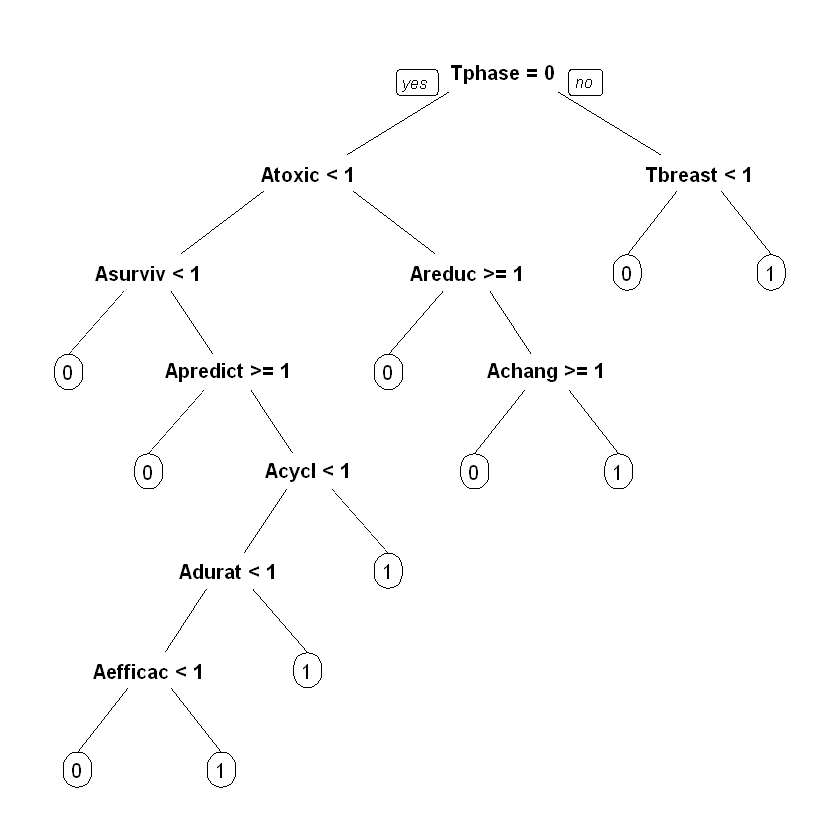

In [32]:
dtmCART = rpart(trial ~ ., data=train, method='class')
prp(dtmCART)

In [33]:
summary(predict(dtmCART)[,2])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.05455 0.13636 0.28750 0.43932 0.78231 0.87189 

In [34]:
predCART = predict(dtmCART, type='class')

In [35]:
table(train$trial, predCART)

   predCART
      0   1
  0 631  99
  1 131 441

In [36]:
accuracy = (631 + 441) / nrow(train)
accuracy

[1] 0.8233487

In [37]:
sensitivity = 441 / (441 + 131)
sensitivity

[1] 0.770979

In [38]:
specificity = 631 / (631 + 99)
specificity

[1] 0.8643836

## Evaluating the model on the testing set

In [39]:
predTest = predict(dtmCART, newdata=test, type='class')
table(test$trial, predTest)

   predTest
      0   1
  0 261  52
  1  83 162

In [40]:
accuracy = (261 + 162) / nrow(test)
accuracy

[1] 0.7580645

In [41]:
library("ROCR")

Loading required package: gplots


Attaching package: 'gplots'


The following object is masked from 'package:stats':

    lowess




In [42]:
predROCR = prediction(predict(dtmCART, newdata=test)[,2], test$trial)

In [43]:
auc = performance(predROCR, "auc")@y.values
auc

[[1]]
[1] 0.8371063